In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)


In [3]:
sep_coins = cv2.imread('DATA/pennies.jpg')

In [4]:
sep_blur = cv2.medianBlur(sep_coins, 25)

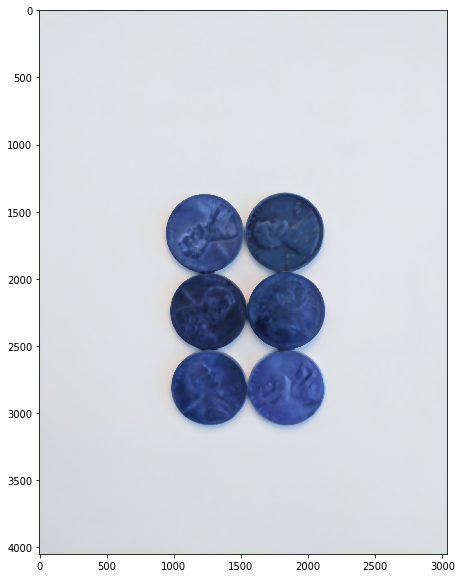

In [5]:
display(sep_blur)

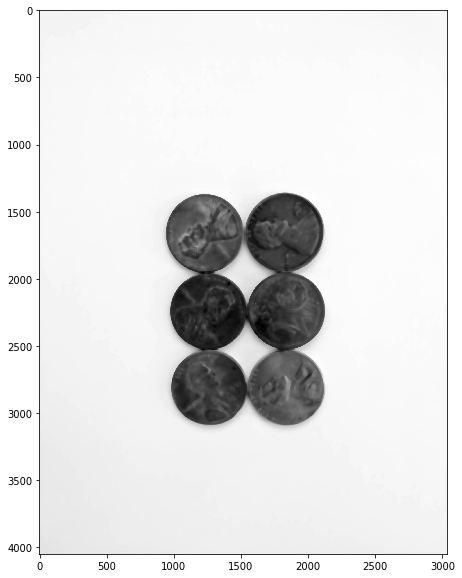

In [6]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

In [14]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

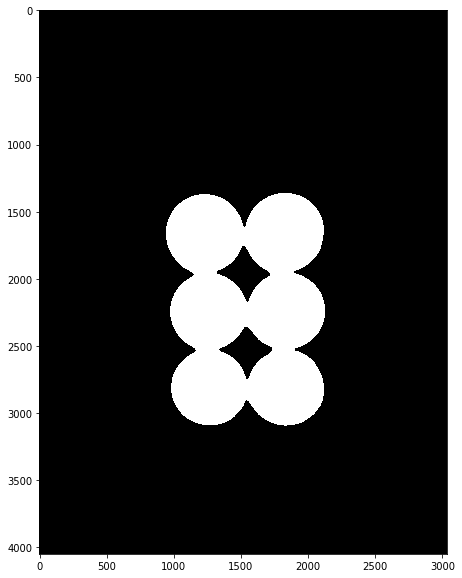

In [15]:
display(sep_thresh)

In [16]:
contours, hierarchy = cv2.findContours(sep_thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
contours, hierarchy = cv2.findContours(sep_thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

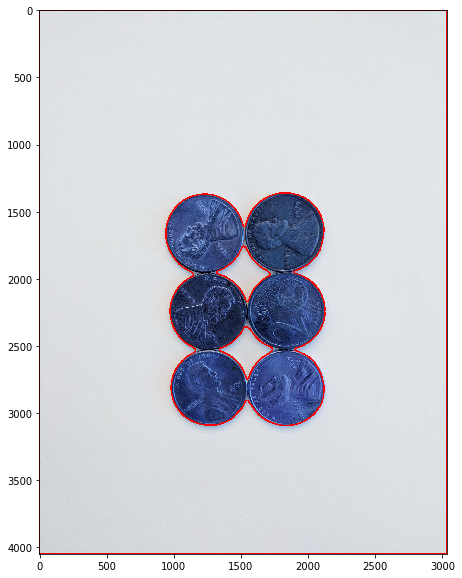

In [18]:
display(sep_coins)

In [19]:
img = cv2.imread('DATA/pennies.jpg')

In [20]:
img = cv2.medianBlur(img, 35)

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [23]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

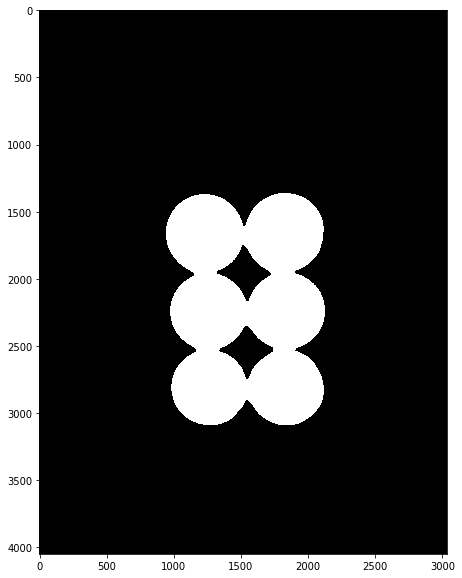

In [24]:
display(thresh)

In [25]:
kernel = np.ones((3, 3), np.uint8)

In [26]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [29]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

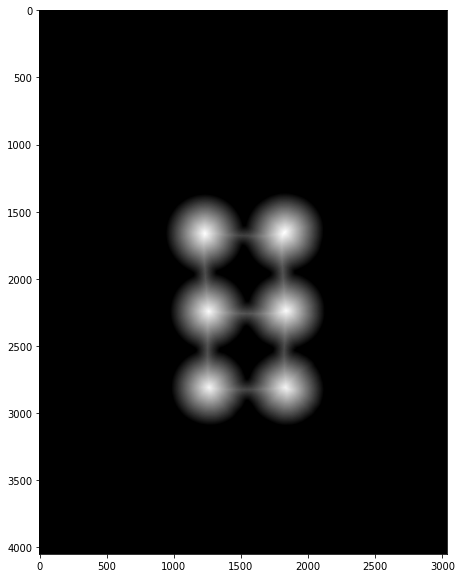

In [30]:
display(dist_transform)

In [35]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

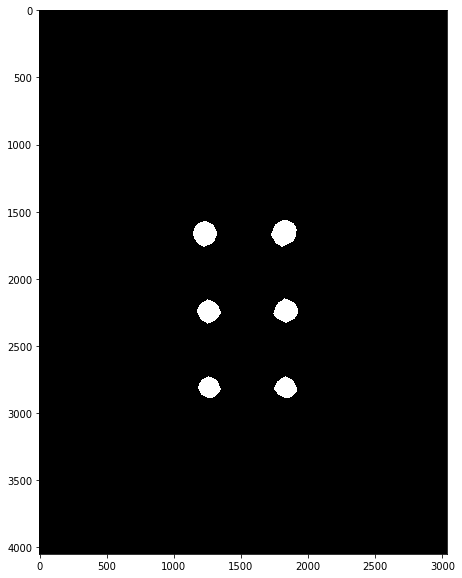

In [36]:
display(sure_fg)

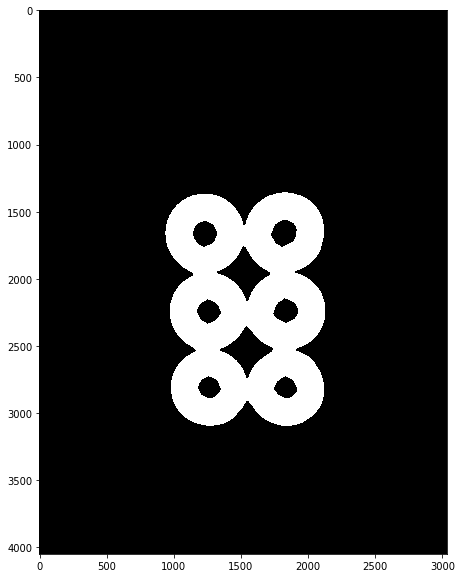

In [38]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)

In [39]:
ret, markers = cv2.connectedComponents(sure_fg)

In [40]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [41]:
markers = markers + 1

In [42]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [44]:
markers[unknown==255]=0

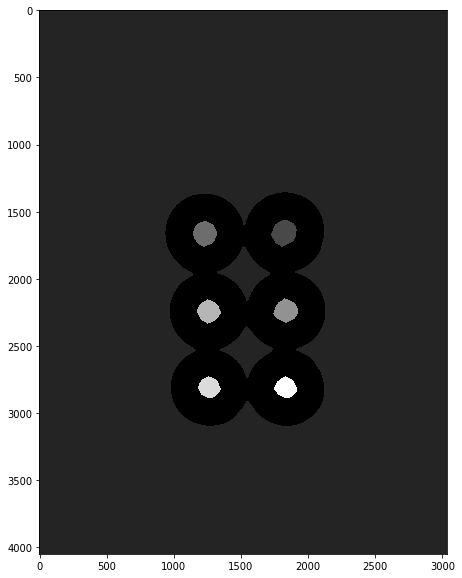

In [45]:
display(markers)

In [46]:
markers = cv2.watershed(img, markers)

In [47]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

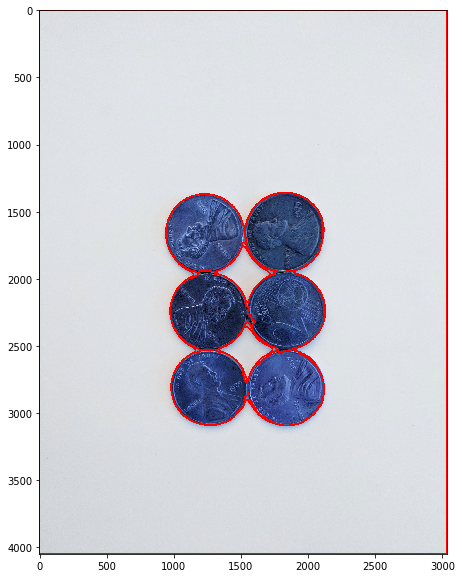

In [48]:
display(sep_coins)